In [20]:
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.cm import get_cmap
from matplotlib.lines import Line2D

In [21]:
def get_counts_vector(labels_vector):
    unique_labels, label_counts = np.unique(labels_vector, return_counts=True)
    counts_vector = np.zeros(22, dtype=int)
    counts_vector[unique_labels] = label_counts
    return counts_vector, unique_labels

/Users/aleksandraivanova/Desktop/CMSCB/data/CBFB_MYH11/POM/single_cell_probabilities.npy
/Users/aleksandraivanova/Desktop/CMSCB/data/CBFB_MYH11/XIE/single_cell_probabilities.npy
/Users/aleksandraivanova/Desktop/CMSCB/data/CBFB_MYH11/DQV/single_cell_probabilities.npy
/Users/aleksandraivanova/Desktop/CMSCB/data/CBFB_MYH11/ZEE/single_cell_probabilities.npy
/Users/aleksandraivanova/Desktop/CMSCB/data/CBFB_MYH11/BTB/single_cell_probabilities.npy
/Users/aleksandraivanova/Desktop/CMSCB/data/CBFB_MYH11/FOL/single_cell_probabilities.npy
/Users/aleksandraivanova/Desktop/CMSCB/data/CBFB_MYH11/NCD/single_cell_probabilities.npy
/Users/aleksandraivanova/Desktop/CMSCB/data/CBFB_MYH11/OUR/single_cell_probabilities.npy
/Users/aleksandraivanova/Desktop/CMSCB/data/CBFB_MYH11/HFM/single_cell_probabilities.npy
/Users/aleksandraivanova/Desktop/CMSCB/data/CBFB_MYH11/SBY/single_cell_probabilities.npy
/Users/aleksandraivanova/Desktop/CMSCB/data/CBFB_MYH11/ZVS/single_cell_probabilities.npy
/Users/aleksandraivan

/var/folders/2g/p3c0p25x73n8tww1p_0s5x_r0000gn/T/ipykernel_25789/2175701329.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab20', len(unique_labels))
/var/folders/2g/p3c0p25x73n8tww1p_0s5x_r0000gn/T/ipykernel_25789/2175701329.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab20')


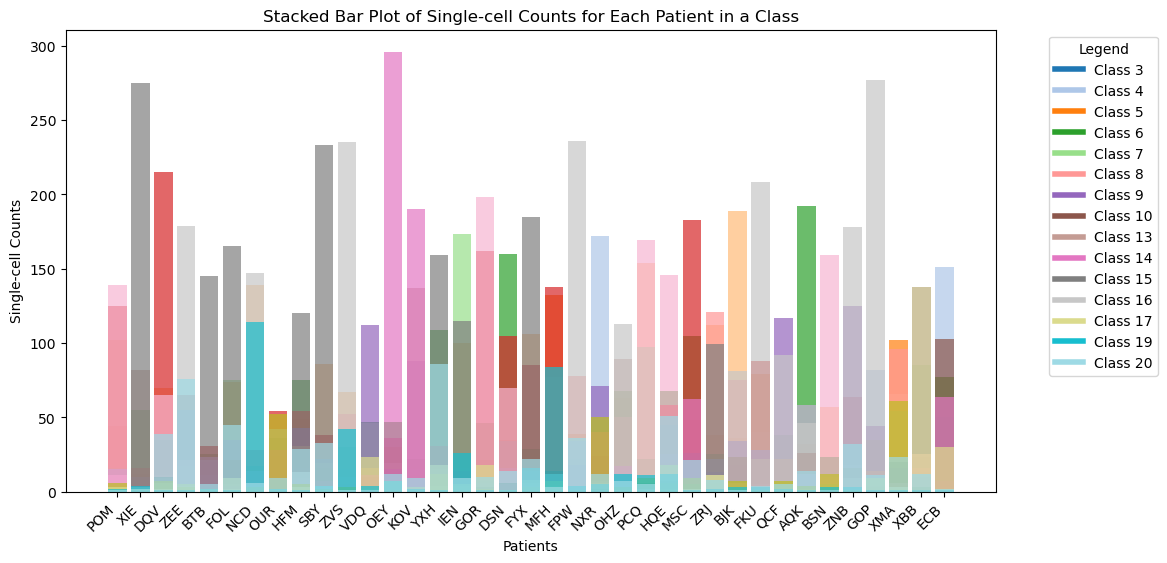

In [24]:
# Path to the folder containing your files
class_path = '/Users/aleksandraivanova/Desktop/CMSCB/data/CBFB_MYH11'

# Initialize lists to store data for plotting
patient_folder_names = []
stacked_counts_vectors = []

# Iterate over all files in the folder
for patient_folder in os.listdir(class_path):

    if(len(patient_folder)==3):
    
        probs_path = os.path.join(class_path, patient_folder) + '/single_cell_probabilities.npy'

        print(probs_path)
        sc_probs = np.load(probs_path)
        sc_class= np.argmax(sc_probs, axis=1)
        counts_vector,unique_labels = get_counts_vector(sc_class)

        # Create a custom color list for each position
        cmap = get_cmap('tab20', len(unique_labels))
        colors = [cmap(i) for i in range(len(unique_labels))]
        
        # Append data for plotting
        patient_folder_names.append(patient_folder)
        stacked_counts_vectors.append((counts_vector, unique_labels, colors))

cmap = get_cmap('tab20')

# Create a stacked bar plot for each file
fig, ax = plt.subplots(figsize=(12, 6)) 
for i, (counts_vector, unique_labels, colors) in enumerate(stacked_counts_vectors):
    ax.bar(patient_folder_names[i], counts_vector[unique_labels], label=f"File {i + 1}", alpha=0.7, color=colors)

# Create a legend showing which color corresponds to which class label
legend_elements = [Line2D([0], [0], color=color, lw=4, label=f'Class {label}') for label, color in zip(unique_labels, colors)]
ax.legend(handles=legend_elements, title="Legend", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add labels and legend
ax.set_xlabel("Patients")
ax.set_ylabel("Single-cell Counts")
ax.set_title("Stacked Bar Plot of Single-cell Counts for Each Patient in a Class")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()